In [1]:
# Import library yang dibutuhkan, yaitu library pandas dan matplotlib
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Upload dataset CSV
from google.colab import files
uploaded = files.upload()

Saving retail_raw_reduced.csv to retail_raw_reduced.csv


In [3]:
# Membaca dataset CSV
data = pd.read_csv("retail_raw_reduced.csv")

In [4]:
# Memanggil dataset 5 teratas
data.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [5]:
# Memanggil dataset 5 terakhir
data.tail()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000
4999,1720036,2019-11-24,17609,Jakarta Pusat,DKI Jakarta,P3334,BRAND_S,1,1045000


In [6]:
# Membuat kolom order_month
data['order_month'] = data['order_date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))

In [7]:
# Membuat kolom GMV
data['gmv'] = data['item_price'] * data['quantity']

(0.0, 41.05)

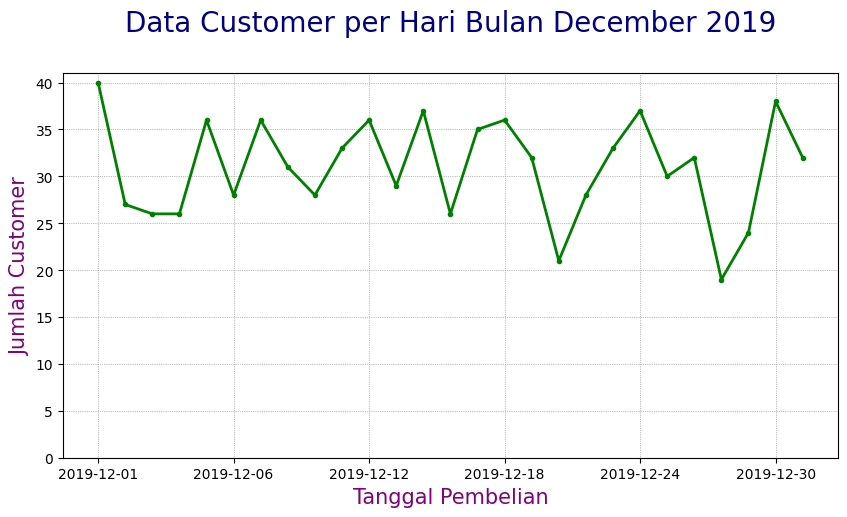

In [8]:
# Membuat plot grafik sesuai spesifikasi
plt.figure(figsize=(10, 5))
data[data['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='green', marker='.', linewidth=2)
plt.title('Data Customer per Hari Bulan December 2019', loc='center', pad=30, fontsize=20, color='navy')
plt.xlabel('Tanggal Pembelian', fontsize=15, color='purple')
plt.ylabel('Jumlah Customer', fontsize=15, color='purple')
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

**Case 1 :**


Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya
untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands
tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [9]:
# Mengambil informasi top 5 brands berdasarkan quantity
top_brands = (data[data['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
# Membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
data_top5brand_dec = data[(data['order_month']=='2019-12') & (data['brand'].isin(top_brands['brand'].to_list()))]
# Print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


**Case 2 : Multi-line chart daily quantity untuk brand top 5**


Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1
tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain).
Beri anotasi untuk titik lonjakan tersebut.

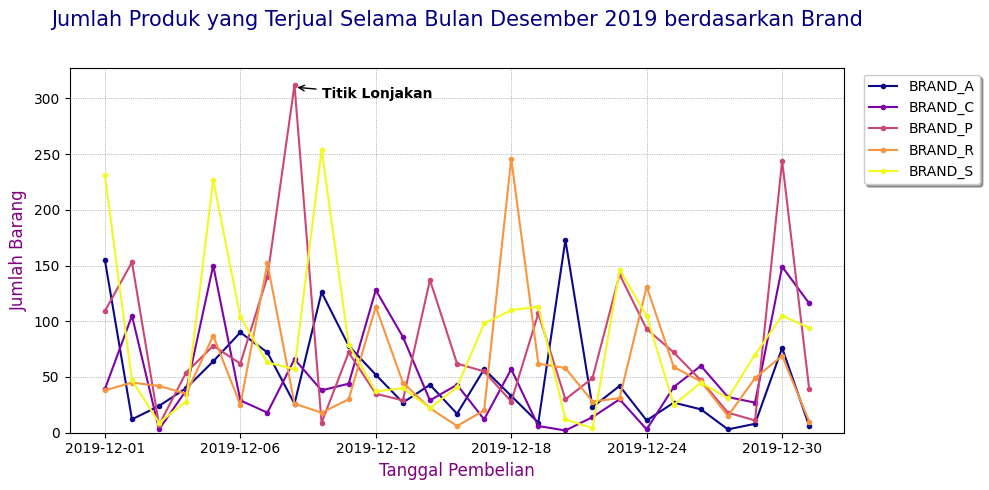

In [10]:
data_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Jumlah Produk yang Terjual Selama Bulan Desember 2019 berdasarkan Brand',loc='center',pad=30, fontsize=15, color='navy')
plt.xlabel('Tanggal Pembelian', fontsize = 12, color='purple')
plt.ylabel('Jumlah Barang',fontsize = 12, color='purple')
plt.grid(color='grey', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Titik Lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='black',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='black'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

**Case 3 :**

Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan
barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

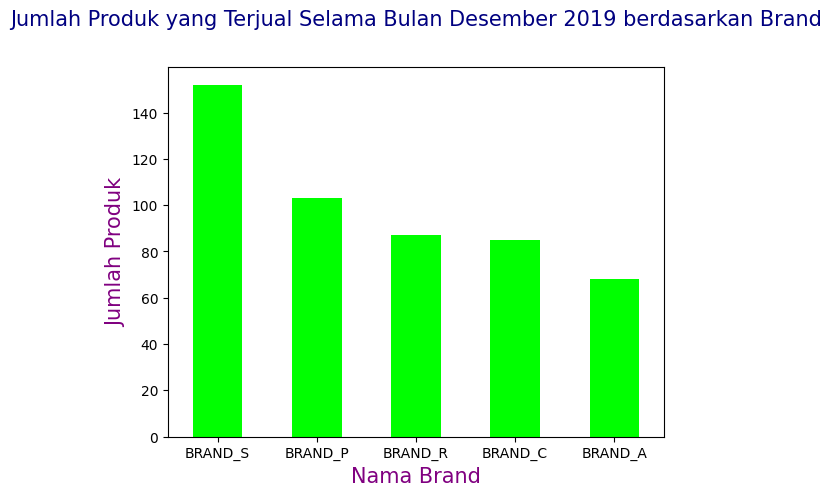

In [11]:
plt.clf()
data_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='lime')
plt.title('Jumlah Produk yang Terjual Selama Bulan Desember 2019 berdasarkan Brand',loc='center',pad=30, fontsize=15, color='navy')
plt.xlabel('Nama Brand', fontsize = 15, color='purple')
plt.ylabel('Jumlah Produk',fontsize = 15, color='purple')
plt.ylim(ymin=0)
plt.xticks(rotation=0)

**Case 4 : Penjualan produk di atas 100 dan di bawah 100 selama Desember 2019**

Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di
bulan Desember 2019. Apakah ada pola yang menarik?

In [12]:
# Membuat dataframe baru, untuk agregat jumlah quantity terjual per produk
data_top5brand_dec_per_product = data_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

In [13]:
# Beri kolom baru untuk menandai produk yang terjual >=100 dan <100
data_top5brand_dec_per_product['quantity_group'] = data_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
data_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

In [14]:
# Membuat referensi pengurutan brand berdasarkan banyaknya semua produk
s_sort = data_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

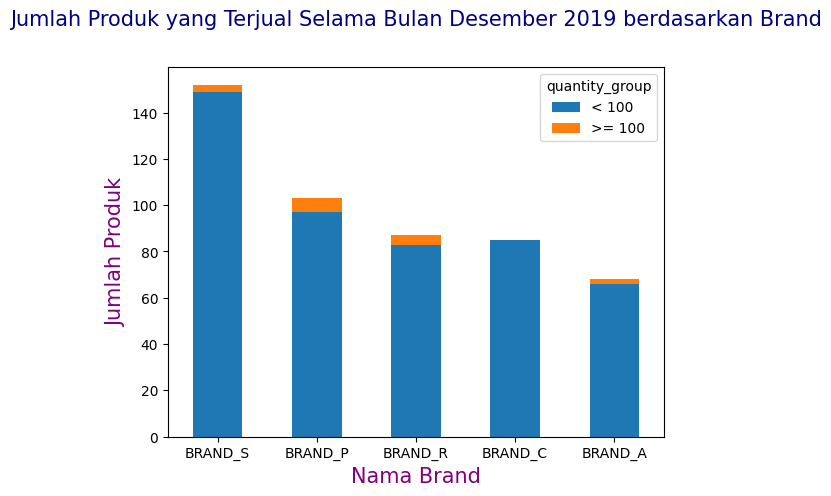

In [15]:
# Plot stacked barchart
data_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah Produk yang Terjual Selama Bulan Desember 2019 berdasarkan Brand',loc='center',pad=30, fontsize=15, color='navy')
plt.xlabel('Nama Brand', fontsize = 15, color='purple')
plt.ylabel('Jumlah Produk',fontsize = 15, color='purple')
plt.ylim(ymin=0)
plt.xticks(rotation=0)

**Case 5 : Murah atau mahalkah harga produk brand top 5**

Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap
product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah
atau yang mahal?

(0.0, 2000000.0)

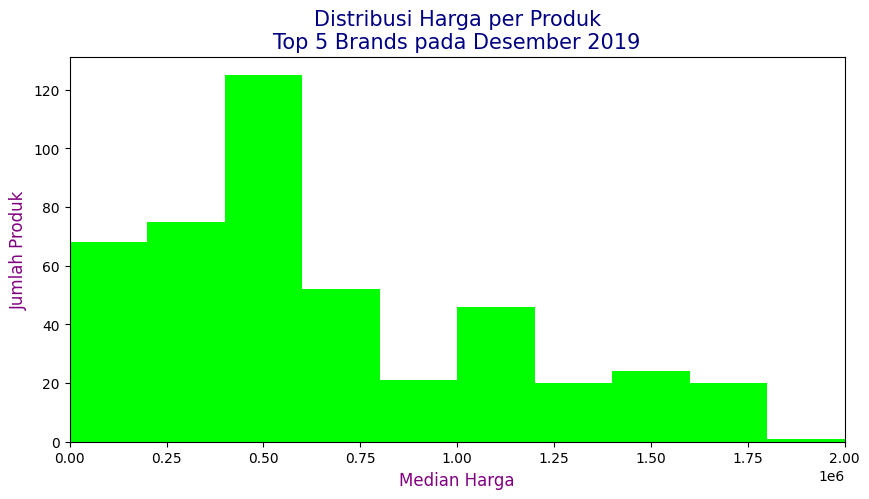

In [16]:
plt.figure(figsize=(10,5))
plt.hist(data_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='lime')
plt.title('Distribusi Harga per Produk\nTop 5 Brands pada Desember 2019',fontsize=15, color='navy')
plt.xlabel('Median Harga', fontsize = 12, color='purple')
plt.ylabel('Jumlah Produk',fontsize = 12, color='purple')
plt.xlim(xmin=0,xmax=2000000)

**Case 6a : Korelasi quantity vs GMV**

Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan
median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

([<matplotlib.axis.YTick at 0x7feb33b493f0>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

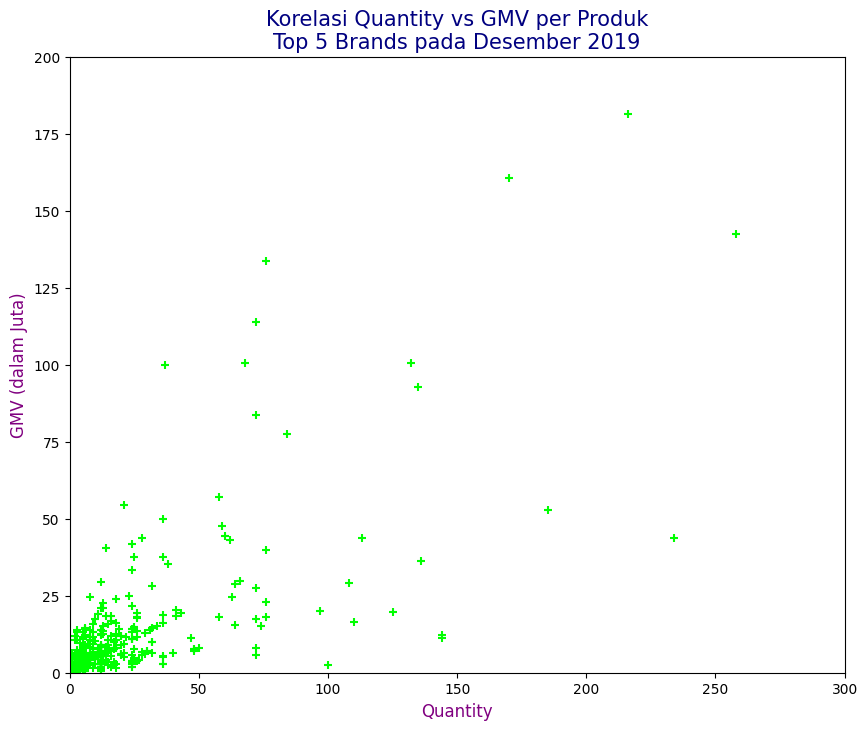

In [17]:
#agregat per product
data_per_product_top5brand_dec = data_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='lime')
plt.title('Korelasi Quantity vs GMV per Produk\nTop 5 Brands pada Desember 2019',fontsize=15, color='navy')
plt.xlabel('Quantity', fontsize = 12, color='purple')
plt.ylabel('GMV (dalam Juta)',fontsize = 12, color='purple')
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

**Case 6b : Korelasi median harga vs quantity**

Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case
6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih
banyak?

(0.0, 250.0)

<Figure size 640x480 with 0 Axes>

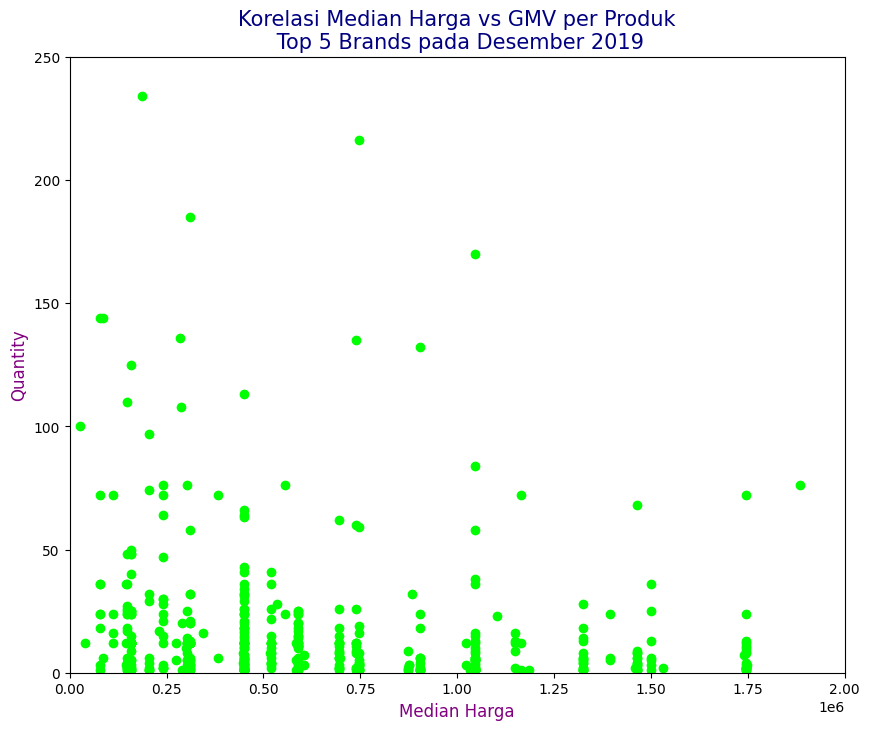

In [18]:
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = data_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='lime')
plt.title('Korelasi Median Harga vs GMV per Produk\n Top 5 Brands pada Desember 2019',fontsize=15, color='navy')
plt.xlabel('Median Harga', fontsize = 12, color='purple')
plt.ylabel('Quantity',fontsize = 12, color='purple')
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)